# Classification με K- nearest neighbor
## Μείωση διαστάσεων Principal component anaysis & Linear Discriminant Analysis
- Επιλέχθηκαν 1000 εικόνες από την κάθε κλάση και τοποθετήθηκαν στον αντίστοιχο φάκελο χειροκίνητα, η επιλογή έγινε με βάση τα ελάχιστα δεδομένα που απαιτούσε η εργασία.
- θυμίζω έγινε ενα χώρισμα των κλάσεων ανάμεσα σε εμένα (Οδυσσέας) και την Δήμητρα λόγω προβλήματος έλλειψηε labels στα δικά της data, όπως είχαμε συζητήσει ακι στο μάθημα.

## Άνοιγμα των φακέλων διαδοχικά και εισαγωγή των εικόνων σε numpy arrays

In [36]:
# Load images and labels
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

# # Define the input directory
input_dir = '/Users/odys/Desktop/ML_LOCAL_MAC/archive_1000pics'

# Initialize lists to store images and labels
images = []
labels = []

# Loop through each folder (class name) in the input directory
for category in os.listdir(input_dir):
    category_path = os.path.join(input_dir, category)
    if os.path.isdir(category_path):  # Ensure it's a directory
        for file_name in os.listdir(category_path):
            if file_name.endswith('.jpeg') or file_name.endswith('.png'):  # Check for valid image files
                img_path = os.path.join(category_path, file_name)
                try:
                    # Open and preprocess the image
                    img = Image.open(img_path)
                    img_array = np.array(img)
                    
                    # Append the image and its label
                    images.append(img_array)
                    labels.append(category)  # Use the folder name as the label
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Print some information about the loaded data
print(f"Loaded {len(images)} images.")
print(f"Image shape: {images[0].shape} ")
print(f"Labels: {np.unique(labels)}")


Loaded 4000 images.
Image shape: (64, 64) 
Labels: ['AbdomenCT' 'BreastMRI' 'Hand' 'HeadCT']


## Χώρισμα των δεδομένων σε train και test σύνολα.
 

In [37]:
from sklearn.model_selection import train_test_split

# Set random_state for reproducibility
random_state = 42

# Split into train and test only
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.3, random_state=random_state, stratify=labels
)

print(f"Shape Train set: {X_train.shape}, labels: {y_train.shape}")
print(f"Shape Test set: {X_test.shape}, labels:{y_test.shape}")

Shape Train set: (2800, 64, 64), labels: (2800,)
Shape Test set: (1200, 64, 64), labels:(1200,)


## KNN χωρίς μείωση διαστάσεων

In [38]:
# KNN classification without PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Flatten images for classification
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Standardize features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_flat)
X_test_std = scaler.transform(X_test_flat)

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn.fit(X_train_std, y_train)

# Predict on test set
y_pred = knn.predict(X_test_std)

# Evaluate
print("KNN Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred))

KNN Test Accuracy: 0.9908333333333333

KNN Classification Report:
               precision    recall  f1-score   support

   AbdomenCT       0.98      1.00      0.99       300
   BreastMRI       1.00      1.00      1.00       300
        Hand       1.00      0.96      0.98       300
      HeadCT       0.98      1.00      0.99       300

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



## Αξιολόγιση του μοντέλου
- Confusion matrix
- Classification reporta
- ROC curve

Confusion Matrix:
 [[300   0   0   0]
 [  0 300   0   0]
 [  5   0 289   6]
 [  0   0   0 300]]


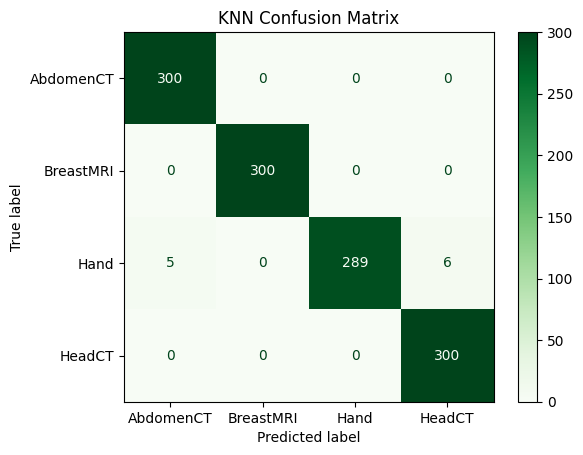

Accuracy: 0.9908
Precision (macro): 0.9910
Recall (macro): 0.9908
F1 Score (macro): 0.9908

Classification Report:
               precision    recall  f1-score   support

   AbdomenCT       0.98      1.00      0.99       300
   BreastMRI       1.00      1.00      1.00       300
        Hand       1.00      0.96      0.98       300
      HeadCT       0.98      1.00      0.99       300

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



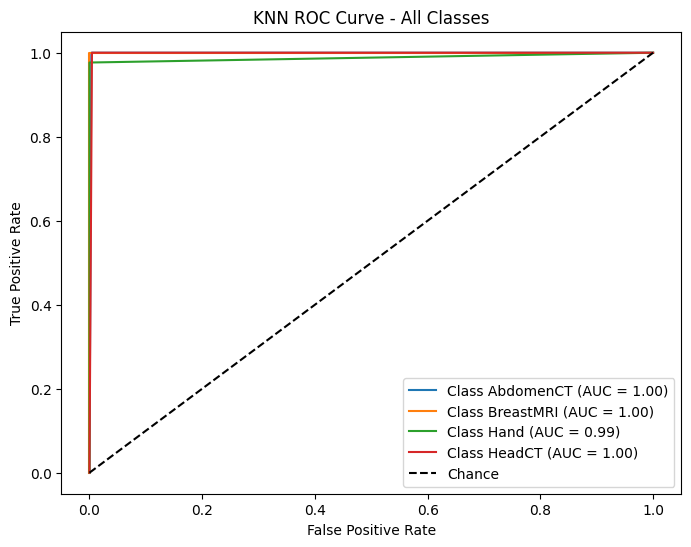

In [39]:
# Assess the model's performance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score,
    recall_score, f1_score, classification_report, roc_curve, auc
)
from sklearn.preprocessing import label_binarize

def assess_model_performance(clf, X_test, y_test, class_labels=None, title_prefix=""):
    """
    Assess and visualize the performance of a classifier.
    
    Parameters:
        clf: Trained classifier
        X_test: Test features
        y_test: True test labels
        class_labels: List of class labels (optional)
        title_prefix: String to prefix plot titles (optional)
    """
    # Predict
    y_pred = clf.predict(X_test)
    if class_labels is None:
        class_labels = np.unique(y_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=class_labels)
    print("Confusion Matrix:\n", cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Greens)
    plt.title(f"{title_prefix} Confusion Matrix")
    plt.show()

    # Accuracy, Precision, Recall, F1
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (macro): {prec:.4f}")
    print(f"Recall (macro): {rec:.4f}")
    print(f"F1 Score (macro): {f1:.4f}")

    # Classification Report
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    # ROC Curve (if possible)
    y_score = None
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)
    elif hasattr(clf, "decision_function"):
        y_score = clf.decision_function(X_test)

    if y_score is not None:
        y_test_bin = label_binarize(y_test, classes=class_labels)
        plt.figure(figsize=(8, 6))
        for i, class_label in enumerate(class_labels):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', label='Chance')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{title_prefix} ROC Curve - All Classes')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print("ROC curve and AUC not available for this classifier.")

# Assess the KNN model's performance
assess_model_performance(knn, X_test_std, y_test, class_labels=np.unique(labels), title_prefix="KNN")

##  Κανονικοποίηση & Principal component analysis
- Πριν την pca  εφαρμόσηκε «flatten» στα δεδομένα των εικόνων από (1000, 64,64) --> (1000, 4096) και κανονικοποίηση των τιμών των pixels με χρήση του standard scaler scikit learn. Τα δεδομένα καταλήγουν με αυτόν τον τρόπο να έχουν μέση τιμή = 0 και τυπική απόκλιση=1.
- Επιλέχθηκε να "μειωθούν" οι εικόνεσ σε τόσα components, έτσι ώστε να διατηρηθεί τουλάχιστον το 90% του explained variance.
- Γ. Παναγάκης, L06-Διαστατικότητα των δεδομένων και PCA (Σειμειώσεις μαθήματος "Μηχανική μάθηση"), 2025. 
- A. Géron, Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, O’Reilly, 2022, p. 247.


Flattened images shape: (2800, 4096)
Standardized flattened images shape: (2800, 4096)
Number of components to explain at least 90% variance: 99


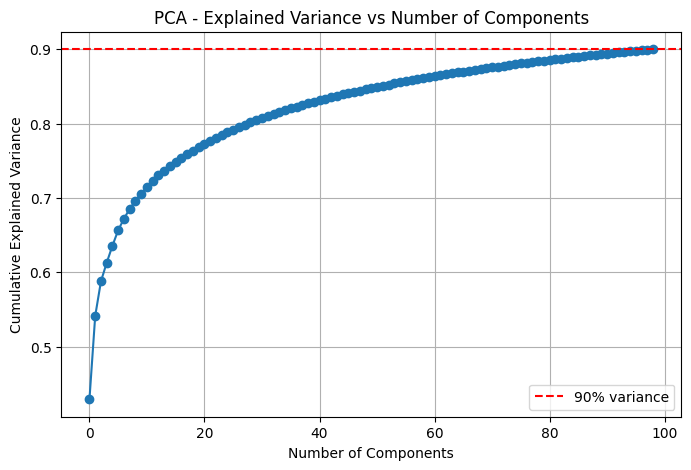

Original shape: (2800, 4096)
PCA reduced shape: (2800, 99)


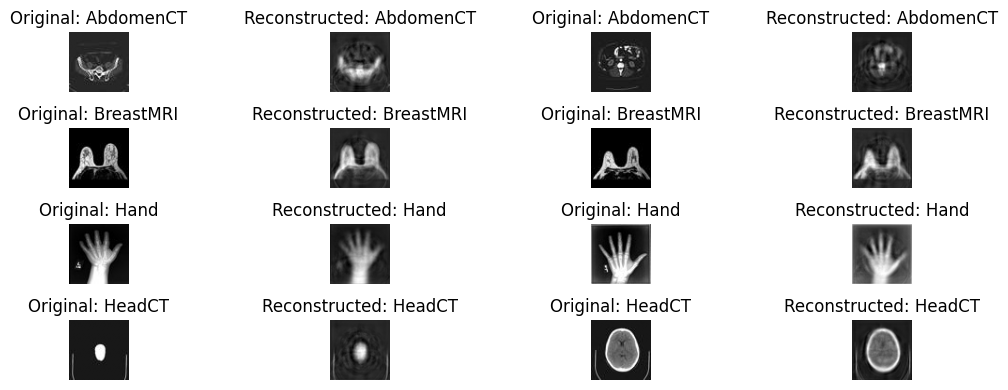

Original image and its PCA vector for each class:



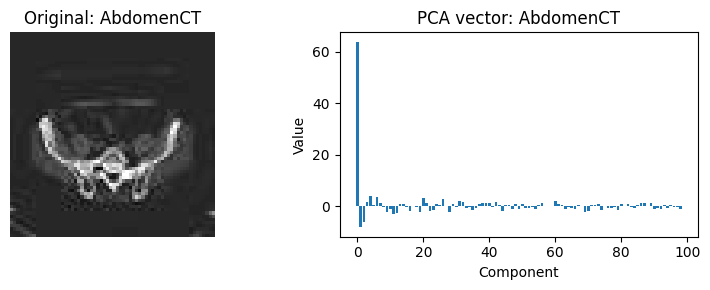

Class: AbdomenCT, PCA vector (first 10 components):
[63.93162429 -8.18977236 -6.00068652  1.65021872  4.0605337   0.64489745
  3.80017801  1.38884297 -0.06843821 -2.21262636]



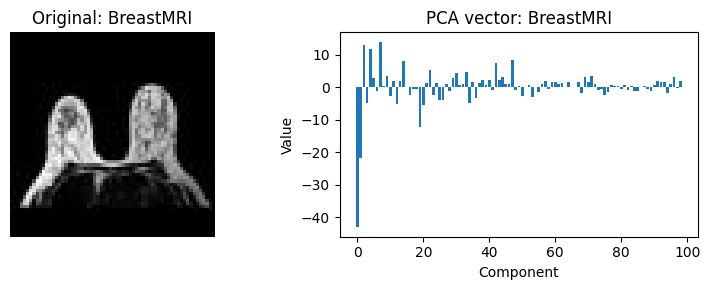

Class: BreastMRI, PCA vector (first 10 components):
[-43.12754752 -21.8493091   12.88196359  -4.86479354  11.91887087
   2.7792897   -1.2432994   14.06298742   0.55218399   3.43277187]



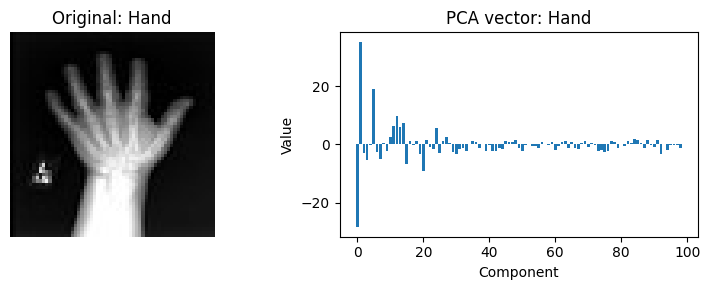

Class: Hand, PCA vector (first 10 components):
[-28.43248885  35.24944149  -2.79427962  -5.25135744  -0.27915133
  18.95039113  -2.42568496  -5.10079797   0.64006074  -2.40290821]



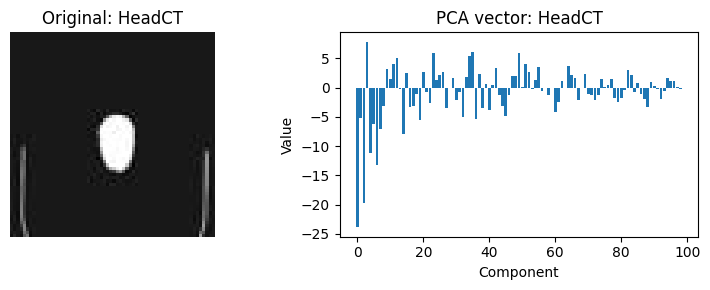

Class: HeadCT, PCA vector (first 10 components):
[-23.91545341  -5.2770418  -19.68050563   7.85033744 -11.15949932
  -6.22473074 -13.20154793  -7.10053899  -3.18191625   3.16935269]



In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Flatten images for PCA
num_samples = X_train.shape[0]
flattened_images = X_train.reshape(num_samples, -1)
print(f"Flattened images shape: {flattened_images.shape}")

# Standardize
scaler = StandardScaler()
flattened_images_std = scaler.fit_transform(flattened_images)
print(f"Standardized flattened images shape: {flattened_images_std.shape}")

# Fit PCA without reducing dimensions to find explained variance
pca_full = PCA()
pca_full.fit(flattened_images_std)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Find the number of components that explain at least 90% variance
n_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components to explain at least 90% variance: {n_components}")

# Now fit PCA with the chosen number of components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(flattened_images_std)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance vs Number of Components')
plt.grid(True)
plt.legend()
plt.show()

print(f"Original shape: {flattened_images.shape}")
print(f"PCA reduced shape: {principal_components.shape}")

# Plot the first 5 images of the training set
# Inverse transform to reconstruct images from PCA
reconstructed = pca.inverse_transform(principal_components)
reconstructed_images = scaler.inverse_transform(reconstructed)
reconstructed_images = reconstructed_images.reshape(X_train.shape)

# Plot 2 images per class: original vs reconstructed
unique_classes = np.unique(y_train)
images_per_class = 2

plt.figure(figsize=(10, 4))  # Bigger images

plot_idx = 1
for class_label in unique_classes:
    # Find indices for this class
    class_indices = np.where(y_train == class_label)[0][:images_per_class]
    for i, idx in enumerate(class_indices):
        plt.subplot(len(unique_classes), images_per_class * 2, plot_idx)
        plt.imshow(X_train[idx], cmap='gray')
        plt.title(f"Original: {class_label}")
        plt.axis('off')
        plot_idx += 1

        plt.subplot(len(unique_classes), images_per_class * 2, plot_idx)
        plt.imshow(reconstructed_images[idx], cmap='gray')
        plt.title(f"Reconstructed: {class_label}")
        plt.axis('off')
        plot_idx += 1

plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()


# For each class, show an original image and its PCA vector (principal component values)
print("Original image and its PCA vector for each class:\n")
for class_label in unique_classes:
    # Find the first index for this class
    idx = np.where(y_train == class_label)[0][0]
    plt.figure(figsize=(8,3))
    
    # Show the original image
    plt.subplot(1,2,1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(f"Original: {class_label}")
    plt.axis('off')
    
    # Show the principal component vector as a bar plot
    plt.subplot(1,2,2)
    plt.bar(np.arange(n_components), principal_components[idx])
    plt.title(f"PCA vector: {class_label}")
    plt.xlabel("Component")
    plt.ylabel("Value")
    plt.tight_layout()
    plt.show()
    
    # Print the PCA vector values
    print(f"Class: {class_label}, PCA vector (first 10 components):\n{principal_components[idx][:10]}\n")

## K-nearest neighbor με μείωση των διαστάσεω με PCA
- Μικρά κέρδη σε acurracy, μείωση όμως αισθητά του κόστους υπλογισμών

In [41]:
# KNN classification with PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create PCA-reduced features for training and testing
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn.fit(X_train_pca, y_train)

# Predict on test set
y_pred = knn.predict(X_test_pca)

# Evaluate
print("KNN Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred))

KNN Test Accuracy: 0.9933333333333333

KNN Classification Report:
               precision    recall  f1-score   support

   AbdomenCT       0.99      1.00      1.00       300
   BreastMRI       1.00      1.00      1.00       300
        Hand       1.00      0.97      0.99       300
      HeadCT       0.98      1.00      0.99       300

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



## Αξιολόγιση του μοντέλου
- Confusion matrix
- Classification reporta
- ROC curve

Confusion Matrix:
 [[300   0   0   0]
 [  0 300   0   0]
 [  3   0 292   5]
 [  0   0   0 300]]


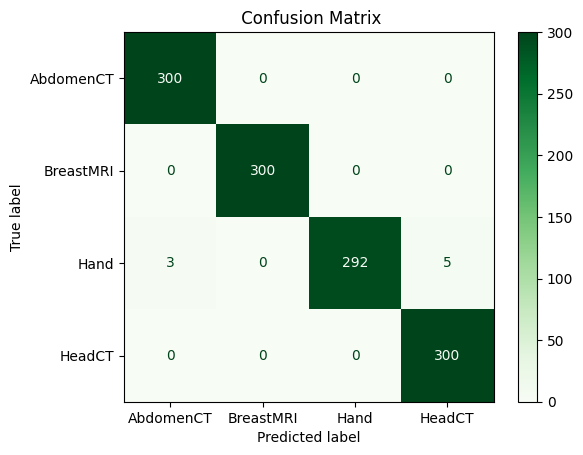

Accuracy: 0.9933
Precision (macro): 0.9934
Recall (macro): 0.9933
F1 Score (macro): 0.9933

Classification Report:
               precision    recall  f1-score   support

   AbdomenCT       0.99      1.00      1.00       300
   BreastMRI       1.00      1.00      1.00       300
        Hand       1.00      0.97      0.99       300
      HeadCT       0.98      1.00      0.99       300

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



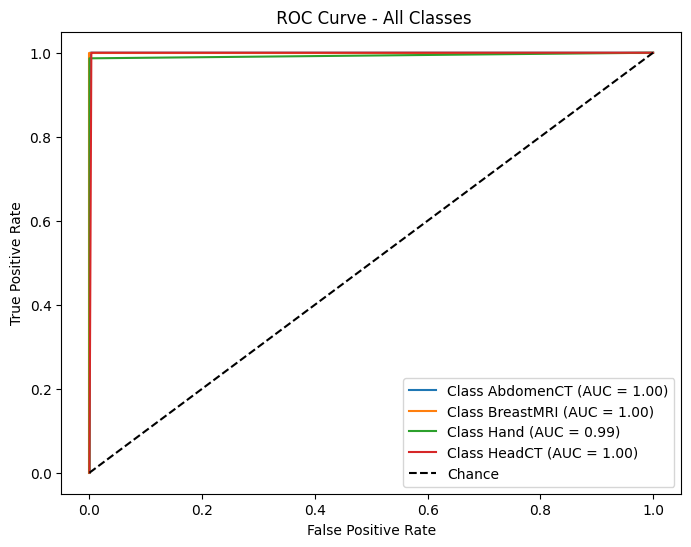

In [42]:
# Assess the model's performance

assess_model_performance(knn, X_test_pca, y_test)

## Συναρτηση για εκτύπωση του ορίου απόφασης
- θα ξαναχρησιμοποιηθεί και σε άλλα σημεια του κώδικα
- τα δεδομένα μας πρέπει να έρθουν σε 2 διαστάσεις

In [43]:
def plot_decision_boundary_2d(clf, X_2d, y, title="Decision Boundary", xlabel="Component 1", ylabel="Component 2", cmap=plt.cm.Set1):
    """
    Plots the decision boundary for a classifier trained on 2D data.
    
    Parameters:
        clf: Trained classifier (must support predict)
        X_2d: 2D feature array (n_samples, 2)
        y: Labels (n_samples,)
        title: Plot title
        xlabel: Label for x-axis
        ylabel: Label for y-axis
        cmap: Matplotlib colormap
    """
    import numpy as np
    import matplotlib.pyplot as plt

    # Create a mesh to plot the decision boundary
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Map class labels to integer indices for contourf
    class_labels = np.unique(y)
    label_to_int = {label: idx for idx, label in enumerate(class_labels)}
    Z_int = np.array([label_to_int[label] for label in Z])
    Z_int = Z_int.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z_int, alpha=0.3, cmap=cmap)

    # Plot training points
    for class_label in class_labels:
        idx = np.where(y == class_label)
        plt.scatter(X_2d[idx, 0], X_2d[idx, 1], label=class_label, edgecolor='k', s=40)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

## Εκτύπωση ορίου απόφασης με χρήση της αντίστοιχης συνάρτησης που κατασκευάστηκε παραπάνω

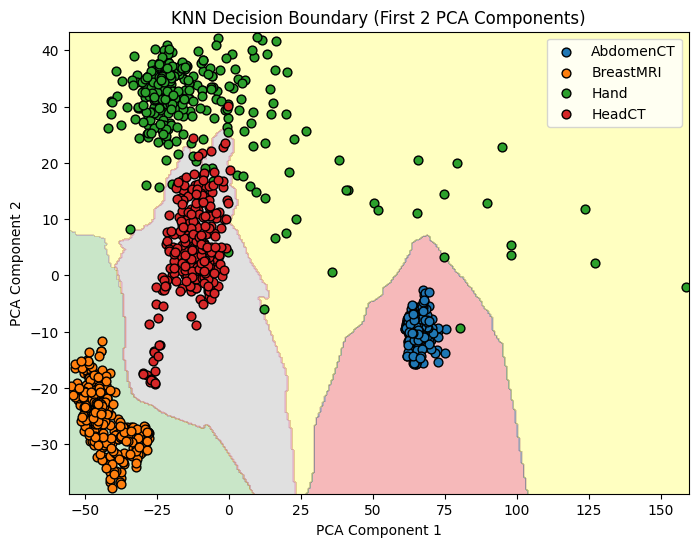

In [44]:
# Plot decision boundary using the first two PCA components of the test set
if X_test_pca.shape[1] >= 2:
    # Fit KNN on first two PCA components for visualization
    knn_2d = KNeighborsClassifier(n_neighbors=5)
    knn_2d.fit(X_train_pca[:, :2], y_train)
    plot_decision_boundary_2d(
        knn_2d,
        X_test_pca[:, :2],
        y_test,
        title="KNN Decision Boundary (First 2 PCA Components)",
        xlabel="PCA Component 1",
        ylabel="PCA Component 2"
    )
else:
    print("Not enough PCA components for 2D decision boundary plot.")

## Αναζήτηση και χρήση των βέλτιστων παραμέτρων με χρήση του GridSearchCV
- Το σημαντικό έδω είναι το σύνολο των παραμέτρωω (δικιμαζόμενες τιμές) που θα χρησιμοποιήσουμε.
- Εδω έγινε μια αρχή βασιζόμενη στην βιβλιογράφια (Practical deep learning : a python-based introduction, Ronald T. Kneusel. &  Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow,A. Géron ) και έπειτα έγιναν δοκιμές με διαφορετικές τιμές μέχρι να καταλήξει στο σύνολο param_grid που φαίνεται παρακάτω.

In [45]:
# Grid search for best hyperparameters in KNN with PCA features

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define parameter grid for KNN
param_grid = {
    'n_neighbors': np.arange(2, 30, 1),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,
    verbose=1
)


# Fit on PCA-reduced training data
grid_search.fit(X_train_pca, y_train)

# Best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.predict(X_test_pca)
print("KNN Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 112 candidates, totalling 336 fits


/Users/odys/Desktop/ML_LOCAL_MAC/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/odys/Desktop/ML_LOCAL_MAC/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/odys/Desktop/ML_LOCAL_MAC/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 472, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/odys/Desktop/ML_LOCAL_MAC/.venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py", line 446, in score
    return super().score(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/odys/Desktop/ML

Best parameters found: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
Best cross-validation score: 0.9964288255288483
KNN Test Accuracy: 0.995

KNN Classification Report:
               precision    recall  f1-score   support

   AbdomenCT       1.00      1.00      1.00       300
   BreastMRI       1.00      1.00      1.00       300
        Hand       1.00      0.98      0.99       300
      HeadCT       0.98      1.00      0.99       300

    accuracy                           0.99      1200
   macro avg       1.00      0.99      0.99      1200
weighted avg       1.00      0.99      0.99      1200



/Users/odys/Desktop/ML_LOCAL_MAC/.venv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.99571428 0.99642883 0.99321339 0.99321339 0.99321339 0.99357066
 0.9928565  0.9928565  0.99249923 0.99321339 0.99142819 0.99142819
 0.99071365 0.99178507 0.98999949 0.99035676 0.98928495 0.99107092
 0.98892806 0.98892806 0.98964222 0.98964222 0.98821314 0.98821314
 0.98892768 0.98892768 0.98857041 0.98857041 0.98785625 0.98892768
 0.98714209 0.98749898 0.98607066 0.98714209 0.9853565  0.98607066
 0.9853565  0.98642755 0.98499923 0.98571339 0.98499923 0.98607066
 0.98428507 0.98535688 0.9839278  0.98428507 0.9824991  0.98357091
 0.98214183 0.9824991  0.98214183 0.9824991  0.98214183 0.98285599
 0.98178494 0.9824991         nan 0.99428559        nan 0.99178507
        nan 0.99249923        nan 0.98928495        nan 0.98964222
        nan 0.98928533        nan 0.9899991         nan 0.98714247
        nan 0.98714247     

## Αξιολόγιση του μοντέλου
- Confusion matrix
- Classification reporta
- ROC curve

Confusion Matrix:
 [[300   0   0   0]
 [  0 300   0   0]
 [  1   0 294   5]
 [  0   0   0 300]]


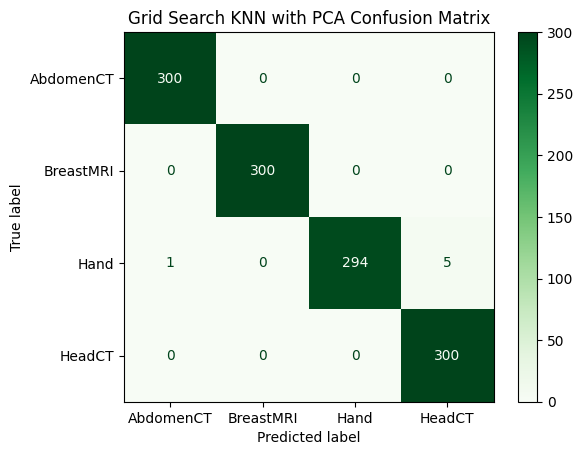

Accuracy: 0.9950
Precision (macro): 0.9951
Recall (macro): 0.9950
F1 Score (macro): 0.9950

Classification Report:
               precision    recall  f1-score   support

   AbdomenCT       1.00      1.00      1.00       300
   BreastMRI       1.00      1.00      1.00       300
        Hand       1.00      0.98      0.99       300
      HeadCT       0.98      1.00      0.99       300

    accuracy                           0.99      1200
   macro avg       1.00      0.99      0.99      1200
weighted avg       1.00      0.99      0.99      1200



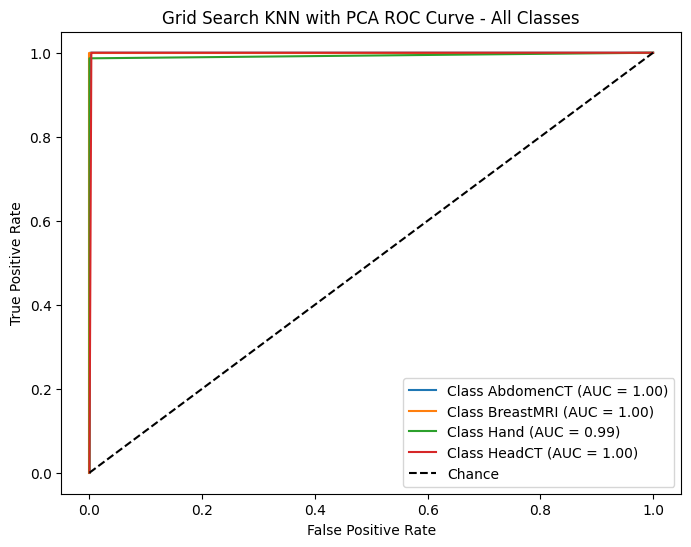

In [46]:
assess_model_performance(grid_search.best_estimator_, X_test_pca, y_test, class_labels=np.unique(y_train), title_prefix="Grid Search KNN with PCA")

## Εκτύπωση ορίου απόφασης με χρήση της αντίστοιχης συνάρτησης που κατασκευάστηκε παραπάνω

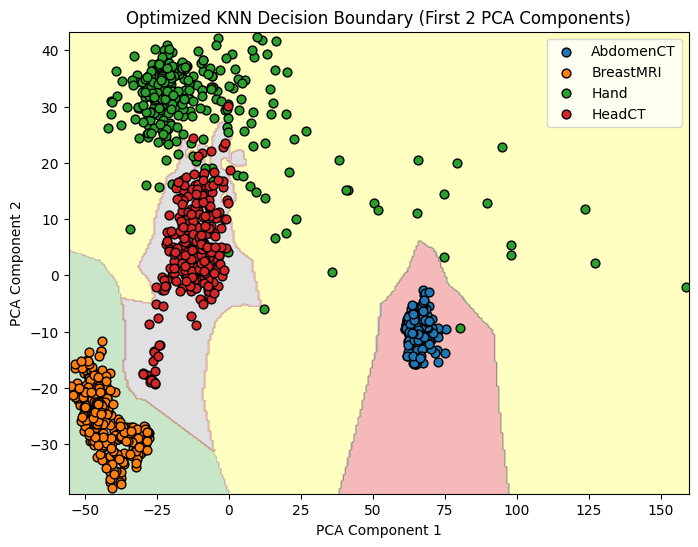

In [47]:
# Plot decision boundary for the optimized KNN (from grid search) using the first two PCA components
if X_test_pca.shape[1] >= 2:
    knn_grid_2d = KNeighborsClassifier(**grid_search.best_params_)
    knn_grid_2d.fit(X_train_pca[:, :2], y_train)
    plot_decision_boundary_2d(
        knn_grid_2d,
        X_test_pca[:, :2],
        y_test,
        title="Optimized KNN Decision Boundary (First 2 PCA Components)",
        xlabel="PCA Component 1",
        ylabel="PCA Component 2"
    )
else:
    print("Not enough PCA components for 2D decision boundary plot.")

## Μια custom  εκδοχή του  KNN hyperparameter tuning, έγινε μόνο και μόνο από ερευνητική περιέργεια καθώς η  υπερπαράμετρος της KNN είναι ευκολα αντιληπτη και κατανοήσιμη.
- Πηγή:  https://medium.com/@agrawalsam1997/hyperparameter-tuning-of-knn-classifier-a32f31af25c7
- Πράγει τα ίδια αποτελέσματα (τουλάχιστον σε αυτήν την περίπτωση με την αντίστοιχη του Sckit learn)
- Με αρκετά καλύτερο χρόνο εκτέλεσης ομως

In [ ]:
#  custom KNN hyperparameter tuning
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 30, 1)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train_pca, y_train)
    train_score[neighbor]=knn.score(X_train_pca, y_train)
    test_score[neighbor]=knn.score(X_test_pca, y_test)


for key, value in test_score.items():
    if value==max(test_score.values()):
        best_no_neighbors = key
        print(best_no_neighbors)



2


## Αντίστοιχα μοντελο KNN με υπερπαράμετρους βελτιστοποιημένους από την custom εκδοχη.
- δεν τυπώνονται αξιολόγισεις και όρια απόφασης καθώς είναι τα ίδια με το βελτιστοποιημενο απο Grid search μοντελο.

In [49]:
# KNN classification with PCA and custom hyperparameter tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Use PCA-reduced features for training and testing
# X_train_pca, X_test_pca, y_train, y_test should already be defined

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=best_no_neighbors)  # You can adjust n_neighbors
knn.fit(X_train_pca, y_train)

# Predict on test set
y_pred = knn.predict(X_test_pca)

# Evaluate
print("KNN Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred))

KNN Test Accuracy: 0.995

KNN Classification Report:
               precision    recall  f1-score   support

   AbdomenCT       0.99      1.00      1.00       300
   BreastMRI       1.00      1.00      1.00       300
        Hand       1.00      0.98      0.99       300
      HeadCT       0.99      1.00      1.00       300

    accuracy                           0.99      1200
   macro avg       1.00      0.99      0.99      1200
weighted avg       1.00      0.99      0.99      1200



##  Κανονικοποίηση & Linear Discriminant Analysis
- Πριν την LDA  εφαρμόσηκε «flatten» στα δεδομένα των εικόνων από (1000, 64,64) --> (1000, 4096) και κανονικοποίηση των τιμών των pixels με χρήση του standard scaler scikit learn [1]. Τα δεδομένα καταλήγουν με αυτόν τον τρόπο να έχουν μέση τιμή = 0 και τυπική απόκλιση=1.
- Ο μέγιστος αρθμος cmponents που μπορεί η LDA να βρέι έιναι ισος με τον αριθμό των κλάσεων-1 αρα για εμένα ίσος με 3.


In [51]:
# LDA (Linear Discriminant Analysis) 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# Flatten images for LDA
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
print(f"Flattened train shape: {X_train_flat.shape}")
print(f"Flattened test shape: {X_test_flat.shape}")
# Standardize features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_flat)
X_test_std = scaler.transform(X_test_flat)

# Number of LDA components (at most n_classes - 1)
n_classes = len(np.unique(y_train))
n_components = n_classes - 1

# Fit LDA on training data
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

print("LDA reduced train shape:", X_train_lda.shape)
print("LDA reduced test shape:", X_test_lda.shape)

Flattened train shape: (2800, 4096)
Flattened test shape: (1200, 4096)
LDA reduced train shape: (2800, 3)
LDA reduced test shape: (1200, 3)


## KNN με μείωση των διαστάσεω με LDA

In [52]:
# KNN classification with LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn.fit(X_train_lda, y_train)

# Predict on test set
y_pred = knn.predict(X_test_lda)

# Evaluate
print("KNN Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred))

KNN Test Accuracy: 0.9425

KNN Classification Report:
               precision    recall  f1-score   support

   AbdomenCT       0.94      1.00      0.97       300
   BreastMRI       0.98      1.00      0.99       300
        Hand       0.95      0.82      0.88       300
      HeadCT       0.90      0.95      0.92       300

    accuracy                           0.94      1200
   macro avg       0.94      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200



## Αξιολόγιση του μοντέλου
- Confusion matrix
- Classification reporta
- ROC curve

Confusion Matrix:
 [[300   0   0   0]
 [  0 300   0   0]
 [ 16   5 247  32]
 [  2   1  13 284]]


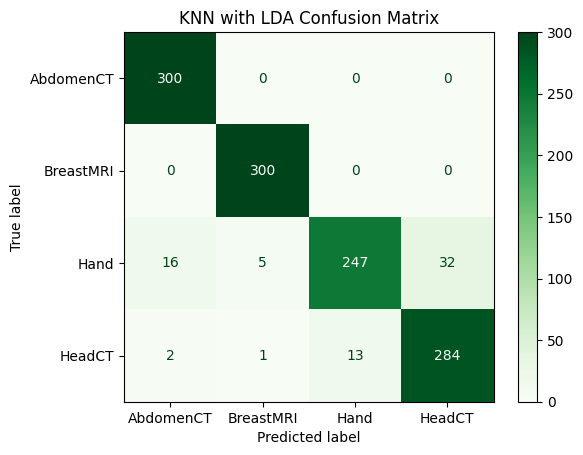

Accuracy: 0.9425
Precision (macro): 0.9431
Recall (macro): 0.9425
F1 Score (macro): 0.9413

Classification Report:
               precision    recall  f1-score   support

   AbdomenCT       0.94      1.00      0.97       300
   BreastMRI       0.98      1.00      0.99       300
        Hand       0.95      0.82      0.88       300
      HeadCT       0.90      0.95      0.92       300

    accuracy                           0.94      1200
   macro avg       0.94      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200



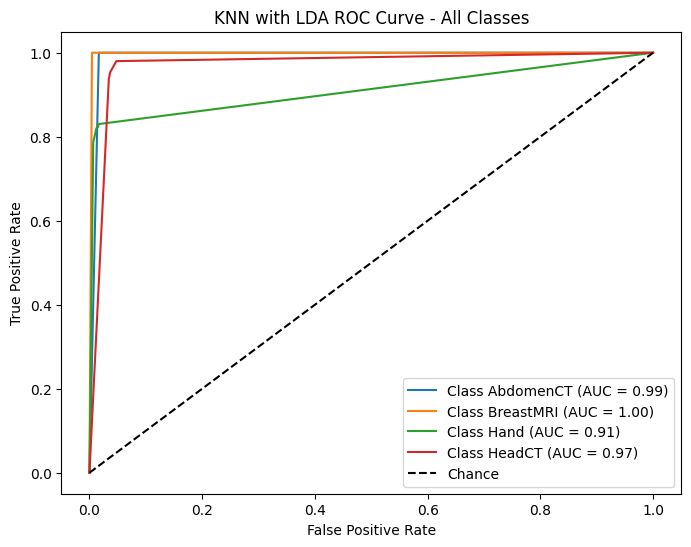

In [53]:
# Fit the KNN classifier on LDA features before assessing performance
knn.fit(X_train_lda, y_train)
assess_model_performance(knn, X_test_lda, y_test, class_labels=np.unique(y_train), title_prefix="KNN with LDA")

## Εκτύπωση ορίου απόφασης
- Λόδω της 2D φύσης του γράφηματος, πρέπει να κρατήσουμε μόνο 2 διαστάσεις από τα δεδομένα μας (τα είδη μειωμένα στ 3 διαστάσεις απο την LDA)

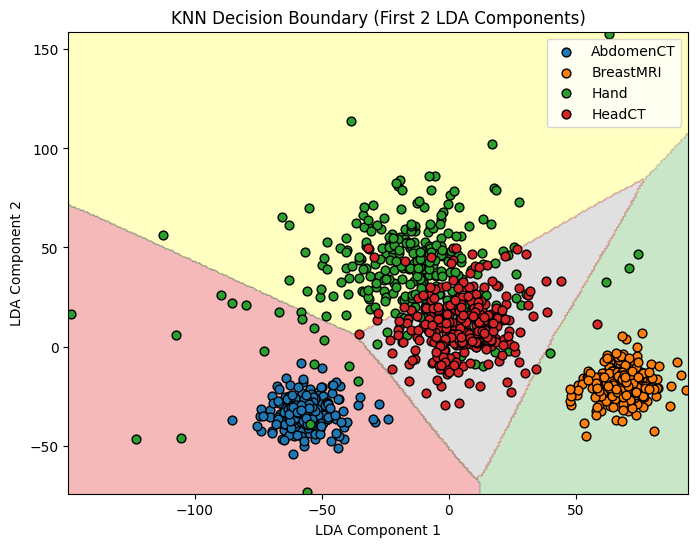

In [54]:
# Plot decision boundary for the KNN model trained on LDA-reduced features using the first two LDA components
if X_test_lda.shape[1] >= 2:
    knn_lda_2d = KNeighborsClassifier(n_neighbors=5)
    knn_lda_2d.fit(X_train_lda[:, :2], y_train)
    plot_decision_boundary_2d(
        knn_lda_2d,
        X_test_lda[:, :2],
        y_test,
        title="KNN Decision Boundary (First 2 LDA Components)",
        xlabel="LDA Component 1",
        ylabel="LDA Component 2"
    )
else:
    print("Not enough LDA components for 2D decision boundary plot.")

## Αναζήτηση και χρήση των βέλτιστων παραμέτρων με χρήση του GridSearchCV
- Το σημαντικό έδω είναι το σύνολο των παραμέτρων (δικιμαζόμενες τιμές) που θα χρησιμοποιήσουμε.
- Εδω έγινε μια αρχή βασιζόμενη στην βιβλιογράφια (Practical deep learning : a python-based introduction, Ronald T. Kneusel. &  Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow,A. Géron ) και έπειτα έγιναν δοκιμές με διαφορετικές τιμές μέχρι να καταλήξει στο σύνολο param_grid που φαίνεται παρακάτω.

In [55]:
# Grid search for best hyperparameters in KNN with LDA features

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define parameter grid for KNN
param_grid = {
    'n_neighbors': np.arange(2, 30, 1),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,
    verbose=2
)

# Fit on LDA-reduced training data
grid_search.fit(X_train_lda, y_train)

# Best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.predict(X_test_lda)
print("KNN Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 112 candidates, totalling 336 fits
[CV] END ..metric=euclidean, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.2s
[CV] END ...metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.2s
[CV] END ...metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.2s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.2s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=4, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, w

## Αξιολόγιση του μοντέλου
- Confusion matrix
- Classification reporta
- ROC curve

Confusion Matrix:
 [[300   0   0   0]
 [  0 300   0   0]
 [ 17   5 245  33]
 [  3   1  14 282]]


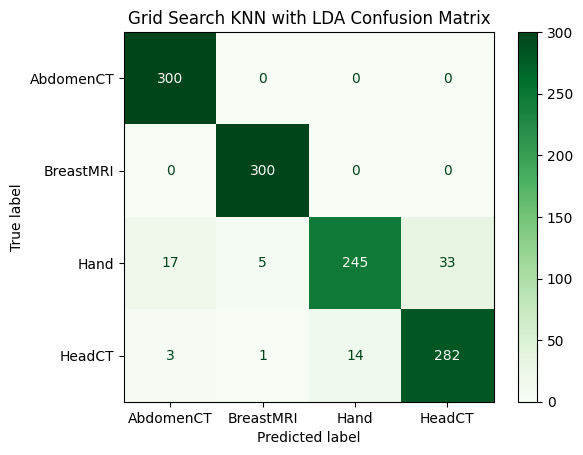

Accuracy: 0.9392
Precision (macro): 0.9398
Recall (macro): 0.9392
F1 Score (macro): 0.9379

Classification Report:
               precision    recall  f1-score   support

   AbdomenCT       0.94      1.00      0.97       300
   BreastMRI       0.98      1.00      0.99       300
        Hand       0.95      0.82      0.88       300
      HeadCT       0.90      0.94      0.92       300

    accuracy                           0.94      1200
   macro avg       0.94      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200



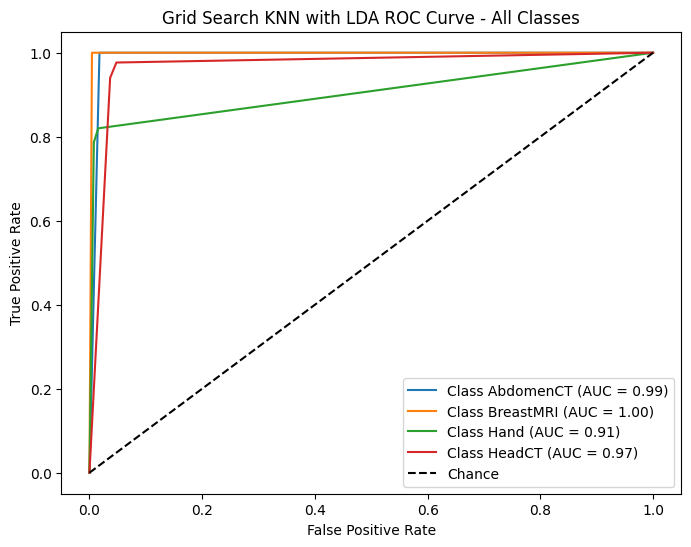

In [56]:
assess_model_performance(grid_search.best_estimator_, X_test_lda, y_test, class_labels=np.unique(y_train), title_prefix="Grid Search KNN with LDA")

## Εκτύπωση ορίου απόφασης
- Λόδω της 2D φύσης του γράφηματος, πρέπει να κρατήσουμε μόνο 2 διαστάσεις από τα δεδομένα μας (τα είδη μειωμένα στ 3 διαστάσεις απο την LDA)

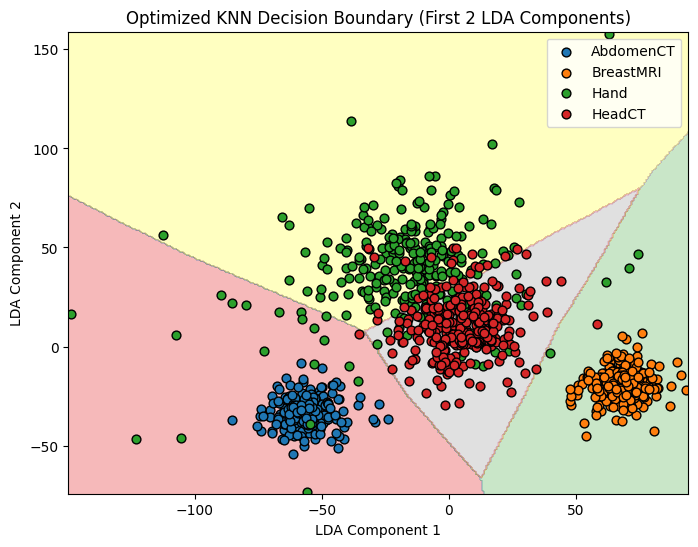

Exception ignored in: <function ResourceTracker.__del__ at 0x1096980e0>
Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/usr/local/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/usr/local/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10cb6c0e0>
Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/usr/local/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/l

In [ ]:
# Plot decision boundary for the optimized KNN (from grid search) using the first two LDA components
if X_test_lda.shape[1] >= 2:
    knn_grid_lda_2d = KNeighborsClassifier(**grid_search.best_params_)
    knn_grid_lda_2d.fit(X_train_lda[:, :2], y_train)
    plot_decision_boundary_2d(
        knn_grid_lda_2d,
        X_test_lda[:, :2],
        y_test,
        title="Optimized KNN Decision Boundary (First 2 LDA Components)",
        xlabel="LDA Component 1",
        ylabel="LDA Component 2"
    )
else:
    print("Not enough LDA components for 2D decision boundary plot.")